# Using SMAC to optimize an artificial black box function (Full example)

* Installation of SMAC and its dependencies
* Definition of cheap 1d function
* Plotting this function
* Using SMAC's fmin interface to optimize the function
* Plotting of how SMAC performed over time
* Visualizing SMAC's acquisition function
* Using other hyperparameters of SMAC's random forest to obtain better predictions

## Installation of SMAC and its Dependencies

In [1]:
!apt-get install swig -y
!pip install Cython
!pip install pyrfr==0.8.0 --no-cache --user
# hack to find pyrfr
import sys
sys.path.insert(0,"./.local/lib/python3.6/site-packages")

!pip install git+https://github.com/automl/SMAC3.git@development

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,080 kB of archives.
After this operation, 5,657 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 swig3.0 amd64 3.0.10-1.2 [1,074 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 swig amd64 3.0.10-1.2 [6,384 B]
Fetched 1,080 kB in 1s (793 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.10-1.2_amd64.deb ...
Unpacking swig3.0 (3.0.10-1.2) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.10-1.2_amd64.deb ...
Un

    100% |████████████████████████████████| 2.2MB 13.9MB/s 
    100% |████████████████████████████████| 184kB 29.1MB/s 
    100% |████████████████████████████████| 163kB 28.7MB/s 
    100% |████████████████████████████████| 552kB 23.5MB/s 
    100% |████████████████████████████████| 71kB 20.8MB/s 
    100% |████████████████████████████████| 6.8MB 5.5MB/s 
  Running setup.py bdist_wheel for smac ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-w6lxif9z/wheels/f4/8d/4f/2ba4cb80693f139ea06c2e8541e012a93738fb56bc1e43a202
  Running setup.py bdist_wheel for pynisher ... - done
  Stored in directory: /content/.cache/pip/wheels/81/35/cb/37fe9c279ac6e56fc8805e146a431c27550dce1ad868ffa04e
  Running setup.py bdist_wheel for ConfigSpace ... - \ | / - \ | / - \

 | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/04/bb/ce/b64b66d9b04eb27445cc5445f69eb35dcd2b5884122be62f13
Successfully built smac pynisher ConfigSpace


## Define Functions

### Define Goldstein Function

In [0]:
import math
import numpy as np

def goldstein_func(x):
  # x is vector; here of length 2
  x1 = x[0]
  x2 = x[1]
  a = 1 + ((x1 + x2 + 1)**2)*(19 - 14*x1 + 3*(x1**2) - 14*x2 + 6*x1*x2 + 3*(x2**2))
  b = 30 + ((2*x1 - 3*x2)**2)*(18 - 32*x1 + 12*(x1**2) + 48*x2 - 36*x1*x2 + 27*(x2**2))
  
  f_opt = 3
  
  #print(a*b)
  
  if (a*b - f_opt == 0):
    return 0
  else:
    return math.log(a*b - f_opt)

### Define Bohachevsky Function

In [0]:
from math import pi

def bohachevsky_func(z):
    x = z[0]
    y = z[1]
    z = x**2 + 2*y**2 - 0.3*math.cos(3*pi*x) - 0.4*math.cos(4*pi*y) + 0.7
    if(z == 0):
        res = 0
    else:
      res = math.log(z)
    return res

### Define Branin Function

In [0]:
def branin_func(z):
    x = z[0]
    y = z[1]
    a = 1
    b = 5.1/(4*pi**2)
    c = 5/pi
    r = 6
    s = 10
    t = 1/(8*pi)
    z = a*(y - b*x**2 + c*x - r)**2 + s*(1-t)*math.cos(x) + s
    if(z-0.397887 == 0):
      res = 0
    else:
      res = math.log(z-0.397887)
    return res

## Plot Functions

### Plot Goldstein Function

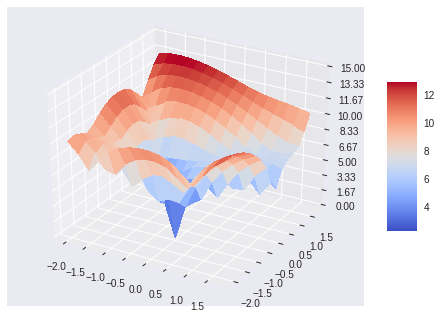

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)

X_gold, Y_gold = np.meshgrid(X, Y)

R = []

for i in range(0, len(X_gold)):
  K = np.array([])
  for j in range(0, len(X_gold[i])):
    a = goldstein_func([X_gold[i][j], Y_gold[i][j]])
    K = np.append(K, [[a]])
  R.append(K)

Z_gold = np.asarray(R)


# Plot the surface.
surf = ax.plot_surface(X_gold, Y_gold, Z_gold, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Plot Bohachevsky Function

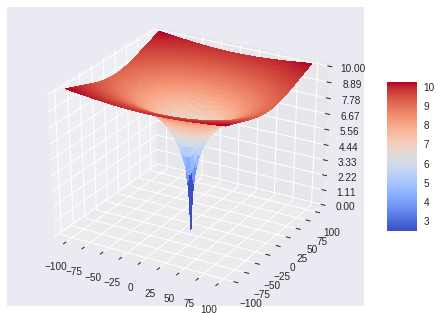

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-100, 100, 0.25)
Y = np.arange(-100, 100, 0.25)


X_boha, Y_boha = np.meshgrid(X, Y)

R = []

for i in range(0, len(X_boha)):
  K = np.array([])
  for j in range(0, len(X_boha[i])):
    a = bohachevsky_func([X_boha[i][j], Y_boha[i][j]])
    K = np.append(K, [[a]])
  R.append(K)

Z_boha = np.asarray(R)


# Plot the surface.
surf = ax.plot_surface(X_boha, Y_boha, Z_boha, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Plot Branin Function

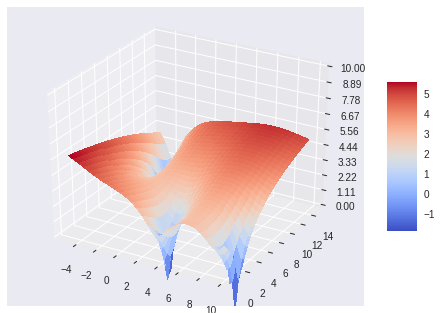

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 10, 0.25)
Y = np.arange(0, 15, 0.25)

X_branin, Y_branin = np.meshgrid(X, Y)

R = []

for i in range(0, len(X_branin)):
  K = np.array([])
  for j in range(0, len(X_branin[i])):
    a = branin_func([X_branin[i][j], Y_branin[i][j]])
    K = np.append(K, [[a]])
  R.append(K)

Z_branin = np.asarray(R)


# Plot the surface.
surf = ax.plot_surface(X_branin, Y_branin, Z_branin, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Optimize with SMAC

In [0]:
num_smac_runs = 2

### Optimize Goldstein Function

In [11]:
from smac.facade.func_facade import fmin_smac

MAX_FUN_gold = 200

smac_list_gold = []
X_list_gold = []
cost_list_gold = []
for i in range(0,num_smac_runs):
  X, cost, smac = fmin_smac(func=goldstein_func,
                       x0=[-2, 2], # default values
                       bounds=[(-2, 2), (-2, 2)], # bounds of each x
                       maxfun=MAX_FUN_gold, # maximal number of function evaluations 
                       rng=np.random.RandomState(42 + i) # random seed
                       )
  smac_list_gold.append(smac)
  X_list_gold.append(X)
  cost_list_gold.append(cost)
  
  print("Best x: %f" %(X[0]))
  print("Best y: %f" %(X[1]))
  print("Best z: %f" %(cost))
  

Best x: 0.003319
Best y: -0.999562
Best z: -5.973751
Best x: -0.011274
Best y: -1.008585
Best z: -3.136379


### Optimize Bohachevsky Function

In [12]:
from smac.facade.func_facade import fmin_smac

MAX_FUN_boha = 200

smac_list_boha = []
X_list_boha = []
cost_list_boha = []
for i in range(0,num_smac_runs):
  X, cost, smac = fmin_smac(func=bohachevsky_func,
                       x0=[-2, 2], # default values
                       bounds=[(-2, 2), (-2, 2)], # bounds of each x
                       maxfun=MAX_FUN_boha, # maximal number of function evaluations 
                       rng=np.random.RandomState(42 + i) # random seed
                       )
  smac_list_boha.append(smac)
  X_list_boha.append(X)
  cost_list_boha.append(cost)
  
  print("Best x: %f" %(X[0]))
  print("Best y: %f" %(X[1]))
  print("Best z: %f" %(cost))

Best x: 0.004723
Best y: 0.002888
Best z: -7.419202
Best x: 0.002004
Best y: 0.005126
Best z: -6.969880


### Optimize Branin Function

In [13]:
from smac.facade.func_facade import fmin_smac

MAX_FUN_branin = 100

smac_list_branin = []
X_list_branin = []
cost_list_branin = []
for i in range(0,num_smac_runs):
  X, cost, smac = fmin_smac(func=branin_func,
                       x0=[-5, 0], # default values
                       bounds=[(-5, 10), (0, 15)], # bounds of each x
                       maxfun=MAX_FUN_branin, # maximal number of function evaluations 
                       rng=np.random.RandomState(42 + i) # random seed
                       )
  smac_list_branin.append(smac)
  X_list_branin.append(X)
  cost_list_branin.append(cost)
  
  print("Best x: %f" %(X[0]))
  print("Best y: %f" %(X[1]))
  print("Best z: %f" %(cost))

Best x: -3.125344
Best y: 12.206987
Best z: -6.161654
Best x: 9.453134
Best y: 2.574281
Best z: -4.653914


## How has SMAC performed over time?

### Plot function

In [0]:
import numpy as np

val = 5
if (num_smac_runs < 5):
  val = num_smac_runs

def plot_smac_performance(smac, MAX_FUN):
  # get runhistory, all runs ever evaluated by smac
  runhistory = smac.get_runhistory()

  # extract x value and corresponding y value
  x_smac = []
  y_smac = []
  for entry in runhistory.data: # iterate over data because it is an OrderedDict
    config_id = entry.config_id # look up config id
    config = runhistory.ids_config[config_id] # look up config
    y_ = runhistory.get_cost(config) # get cost
    x_ = config["x1"] # there is only one entry in our example
    x_smac.append(x_)
    y_smac.append(y_)
  x_smac = np.array(x_smac)
  y_smac = np.array(y_smac)

  fig = plt.figure()
  # Plotting
  plt.plot(y_smac, 'bo')
  plt.xlabel('function evaluation')
  plt.ylabel('function value')

  # let's plot only the best function value at each time step
  y_best = np.zeros(MAX_FUN)
  for id in range(MAX_FUN):
    y_best[id] = np.min(y_smac[:id+1])

  plt.step(y_best, 'k', where="post") # please note that we use step function!

### SMAC Performance Goldstein Function

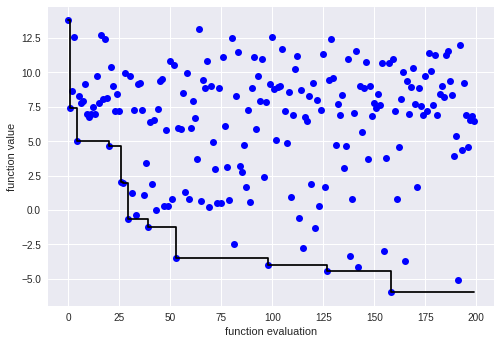

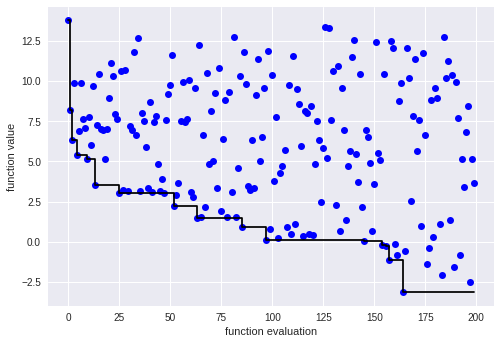

In [17]:
for i in range(0, val):
  plot_smac_performance(smac_list_gold[i], MAX_FUN_gold)

### SMAC Performance Bohachevsky Function

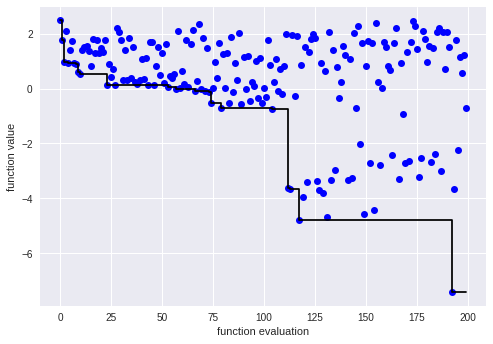

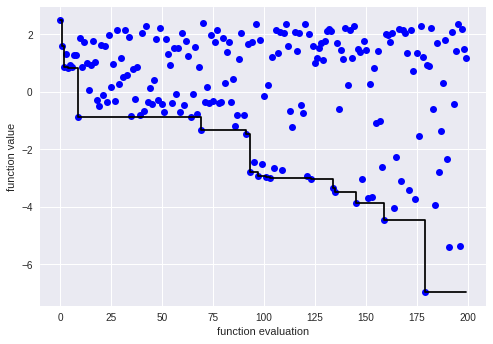

In [18]:
for i in range(0, val):
  plot_smac_performance(smac_list_boha[i], MAX_FUN_boha)

### SMAC Performance Branin Function

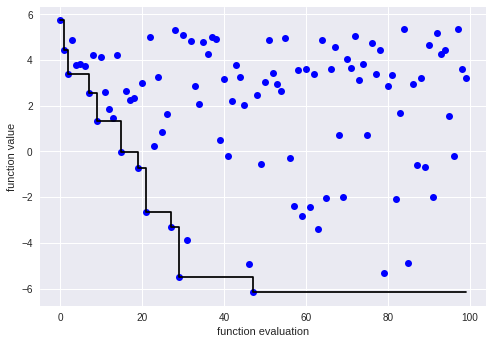

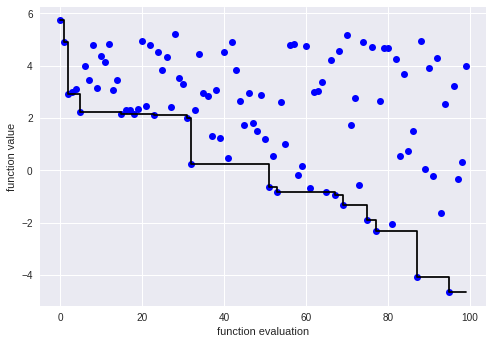

In [19]:
for i in range(0, val):
  plot_smac_performance(smac_list_branin[i], MAX_FUN_branin)

## Compare 20 runs

### Get Data Function

In [0]:
def get_data(smac):

  data = []

  for element in smac:
    # get runhistory, all runs ever evaluated by smac
    runhistory = element.get_runhistory()

    # extract x value and corresponding y value
    x_smac = []
    y_smac = []
    for entry in runhistory.data: # iterate over data because it is an OrderedDict
      config_id = entry.config_id # look up config id
      config = runhistory.ids_config[config_id] # look up config
      y_ = runhistory.get_cost(config) # get cost
      x_ = config["x1"] # there is only one entry in our example
      x_smac.append(x_)
      y_smac.append(y_)
    x_smac = np.array(x_smac)
    y_smac = np.array(y_smac)
    data.append(y_smac)
  return data


### Plot Function

In [0]:
from matplotlib import mlab

def plot_performance(smac_list, MAX_FUN, fig, color, color_face):
  
  median2 = []
  first_quartel = []
  second_quartel = []
  data = get_data(smac_list)
  
  med_of_eval = []
  
  for j in range(0, MAX_FUN):
      
    for i in range(0, len(data)):
      med_of_eval.append(data[i][j])
      
    med_of_eval.sort()
    a, b, c = mlab.prctile(med_of_eval, p=(25.0, 50.0, 75.0))
    median2.append(b)
    first_quartel.append(a)
    second_quartel.append(c)


  # print(first_quartel)
  # print(median2)
  # print(second_quartel)

  ax = fig.add_subplot(111)

  # Plotting
  plt.plot(median2, 'o', color=color)
  ax.fill_between(range(0, MAX_FUN), first_quartel, 
                   second_quartel,alpha=0.5, facecolor=color_face, interpolate=True)

  plt.xlabel('function evaluation')
  plt.ylabel('loss')
  plt.xscale('log')

  plt.step(median2, 'k', where="post", color=color) # please note that we use step function!


### SMAC Performance Goldstein Function

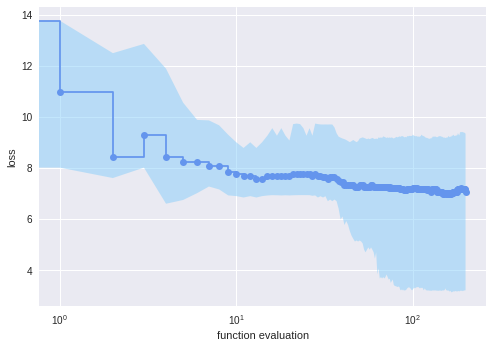

In [57]:
fig_gold = plt.figure()
plot_performance(smac_list_gold, MAX_FUN_gold, fig_gold, 'cornflowerblue', 'lightskyblue')

### SMAC Performance Bohachevsky Function

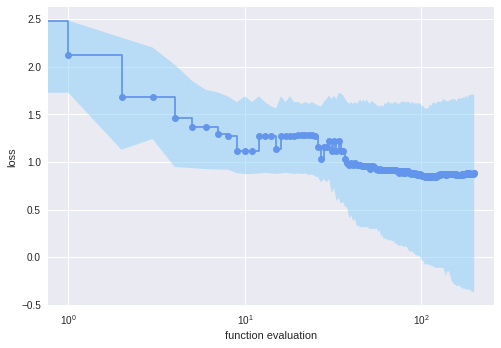

In [58]:
fig_boha = plt.figure()
plot_performance(smac_list_boha, MAX_FUN_boha, fig_boha, 'cornflowerblue', 'lightskyblue')

### SMAC Performance Branin Function

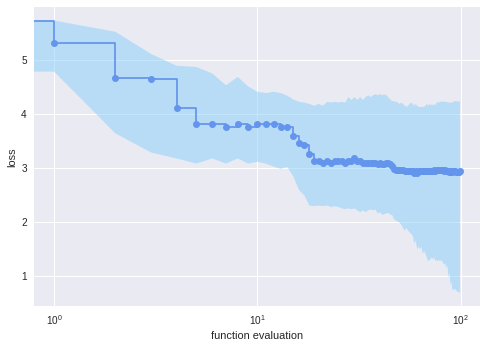

In [45]:
fig_branin = plt.figure()
plot_performance(smac_list_branin, MAX_FUN_branin, fig_branin, 'cornflowerblue', 'lightskyblue')

## Random Search Comparison

### Random Search on Goldstein Function

In [0]:
from smac.facade.roar_facade import ROAR
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter, UniformIntegerHyperparameter, Hyperparameter
from smac.scenario.scenario import Scenario



def run_random_search_goldstein():

  cs = ConfigurationSpace()

  x_points_gold = UniformFloatHyperparameter("x_points_gold", -2, 2, default_value=-2)
  y_points_gold = UniformFloatHyperparameter("y_points_gold", -2, 2, default_value=-2)

  cs.add_hyperparameters([x_points_gold, y_points_gold])


  scenario = Scenario({"run_obj": "quality",   # we optimize quality (alternative runtime)
                        "wallclock_limit": 20, # time for running SMAC
                       "cs": cs,               # configuration space
                       "deterministic": "true",
                       "memory_limit": 3072,   # adapt this to reasonable value for your hardware
                       "output_dir": "",        # deactivate output
                       "maxR": 1
                       })

  def rf_from_cfg(cfg, seed):
    return goldstein_func([cfg["x_points_gold"], cfg["y_points_gold"]])


  roar = ROAR(scenario, tae_runner = rf_from_cfg)

  incumbent = roar.optimize()

  print(incumbent)
  history = roar.get_runhistory()
  print("Cost: " + str(history.get_cost(incumbent)))

  return roar



Configuration:
  x_points_gold, Value: 0.1181624522520055
  y_points_gold, Value: -0.991255911642015

Cost: 1.472517877771046


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


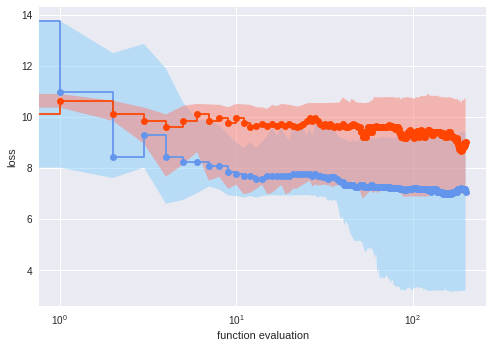

In [61]:
roar_gold = run_random_search_goldstein()

fig_gold2 = plt.figure()
plot_performance(smac_list_gold, MAX_FUN_gold, fig_gold2, 'cornflowerblue', 'lightskyblue')
plot_performance([roar_gold], MAX_FUN_gold, fig_gold2, 'orangered', 'salmon')


### Random Search on Bohachevsky Function

In [0]:
from smac.facade.roar_facade import ROAR
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter, UniformIntegerHyperparameter, Hyperparameter
from smac.scenario.scenario import Scenario



def run_random_search_bohachevsky():

  cs = ConfigurationSpace()

  x_points = UniformFloatHyperparameter("x_points", -100, 100, default_value=-100)
  y_points = UniformFloatHyperparameter("y_points", -100, 100, default_value=-100)

  cs.add_hyperparameters([x_points, y_points])


  scenario = Scenario({"run_obj": "quality",   # we optimize quality (alternative runtime)
                        "wallclock_limit": 20, # time for running SMAC
                       "cs": cs,               # configuration space
                       "deterministic": "true",
                       "memory_limit": 3072,   # adapt this to reasonable value for your hardware
                       "output_dir": "",        # deactivate output
                       "maxR": 1
                       })

  def rf_from_cfg(cfg, seed):
    return bohachevsky_func([cfg["x_points"], cfg["y_points"]])


  roar = ROAR(scenario, tae_runner = rf_from_cfg)

  incumbent = roar.optimize()

  print(incumbent)
  history = roar.get_runhistory()
  print("Cost: " + str(history.get_cost(incumbent)))

  return roar

Configuration:
  x_points, Value: -2.759778042414524
  y_points, Value: -4.143051717790939

Cost: 3.750547794876511


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


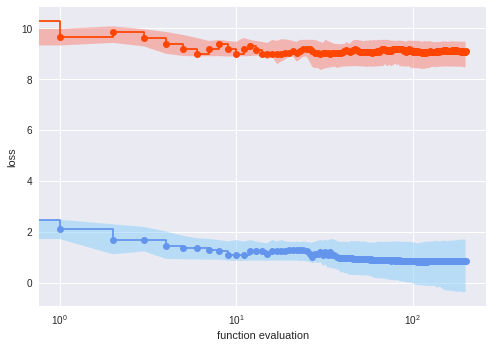

In [63]:
roar_boha = run_random_search_bohachevsky()

fig_boha2 = plt.figure()
plot_performance(smac_list_boha, MAX_FUN_boha, fig_boha2, 'cornflowerblue', 'lightskyblue')
plot_performance([roar_boha], MAX_FUN_boha, fig_boha2, 'orangered', 'salmon')


### Random Search on Branin Function

In [0]:
from smac.facade.roar_facade import ROAR
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter, UniformIntegerHyperparameter, Hyperparameter
from smac.scenario.scenario import Scenario



def run_random_search_branin():

  cs = ConfigurationSpace()

  x_points = UniformFloatHyperparameter("x_points", -5, 10, default_value=-5)
  y_points = UniformFloatHyperparameter("y_points", -0, 15, default_value=0)

  cs.add_hyperparameters([x_points, y_points])


  scenario = Scenario({"run_obj": "quality",   # we optimize quality (alternative runtime)
                        "wallclock_limit": 20, # time for running SMAC
                       "cs": cs,               # configuration space
                       "deterministic": "true",
                       "memory_limit": 3072,   # adapt this to reasonable value for your hardware
                       "output_dir": "",        # deactivate output
                       "maxR": 1
                       })

  def rf_from_cfg(cfg, seed):
    return branin_func([cfg["x_points"], cfg["y_points"]])


  roar = ROAR(scenario, tae_runner = rf_from_cfg)

  incumbent = roar.optimize()

  print(incumbent)
  history = roar.get_runhistory()
  print("Cost: " + str(history.get_cost(incumbent)))

  return roar

Configuration:
  x_points, Value: -3.1044856292671352
  y_points, Value: 12.168982394383368

Cost: -4.976241103618567


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


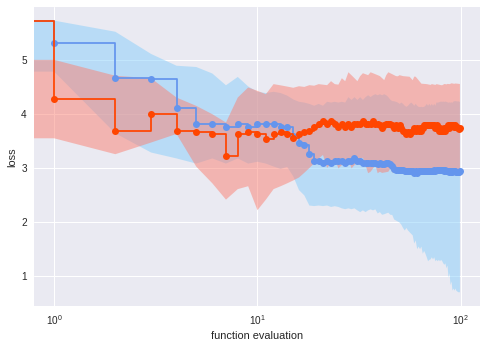

In [65]:
roar_branin = run_random_search_branin()

fig_branin2 = plt.figure()
plot_performance(smac_list_branin, MAX_FUN_branin, fig_branin2, 'cornflowerblue', 'lightskyblue')
plot_performance([roar_branin], MAX_FUN_branin, fig_branin2, 'orangered', 'salmon')